In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Run this when you've made some plots to see the difference

%matplotlib inline

In [3]:
data = pd.read_csv('ufc-fighters-statistics.csv')

### Getting a feel for the data ###

In [4]:
data.duplicated().sum() # Makes sure there isn't any duplicated rows in the data

0

In [5]:
data.shape # Check the number of rows and columns. This dataset contains 4111 rows and 18 columns

(4111, 18)

In [6]:
data.info() # Summary information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

In [7]:
data.describe() # Generates some descriptive statistics about the data

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [8]:
# Noticed that the highest weight value is extremely big relative to the percentiles. Let's check a few of the heaviest fighters.

In [9]:
data.nlargest(5, 'weight_in_kg') # Displays 5 rows with the highest weight_in_kg

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
4069,Emmanuel Yarborough,NaN,1,2,0,203.20,349.27,NaN,Open Stance,1960-09-05,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2731,Teila Tuli,NaN,0,1,0,182.88,195.04,NaN,Orthodox,1969-06-14,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3815,Thomas Ramirez,NaN,0,1,0,185.42,185.97,NaN,Sideways,NaN,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2819,Cory Peterson,LA Giant,2,1,0,210.82,181.44,NaN,Orthodox,NaN,2.17,60.0,6.51,40.0,0.0,0.0,0.0,0.0
3174,John Matua,NaN,1,4,0,187.96,181.44,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0


#### This checks out! A quick google search shows that Emmanuel Yarborough was ~720 pounds. ####

$\;\;\;\;\;\;$
## Changing some column names and units to my preference ##

In [10]:
data.iloc[:,6] *= 2.20462 # Converts weight values from kilograms to pounds

In [11]:
data.iloc[:,5] *= 0.393701 #Converts height values from centimeters to inches

In [12]:
data.iloc[:,7] *= 0.393701 #Converts reach values from centimeters to inches

In [13]:
data.rename(columns={'height_cm': 'height_inches', 'weight_in_kg': 'weight_in_pounds', 'reach_in_cm': 'reach_in_inches'}, inplace = True)
# Changes the column names to reflect the previous changes

In [14]:
# Let's check the top of the dataframe to see where we're at.
data.head()

,name,nickname,wins,losses,draws,height_inches,weight_in_pounds,reach_in_inches,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,75.000041,205.007614,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,73.000039,184.989664,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,70.000038,216.008668,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,66.000036,134.988883,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,75.000041,184.989664,76.000041,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


In [15]:
#The data looks accurate, but it looks like the datatypes were floats, and now we need to re-round them back down.
data.round(2).head()
#Looks good!

,name,nickname,wins,losses,draws,height_inches,weight_in_pounds,reach_in_inches,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,75.0,205.01,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,73.0,184.99,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,70.0,216.01,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,66.0,134.99,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,75.0,184.99,76.0,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4


$\;\;\;\;\;\;$
## Checking for unique and missing data ##

In [16]:
np.sum(data.isnull(), axis=0) #Displays the number of rows with missing data per column

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_inches                                    298
weight_in_pounds                                  87
reach_in_inches                                 1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [17]:
data.columns[np.sum(data.isnull(),axis=0) != 0] #Returns the names of the columns that contain missing data

Index(['nickname', 'height_inches', 'weight_in_pounds', 'reach_in_inches',
       'stance', 'date_of_birth'],
      dtype='object')

In [18]:
for col in data:
    unique_count = data[col].nunique()
    print(col + " has " + str(unique_count) + " unique values")

# Simple for loop to print the column names along with how many unique values they contain

name has 4105 unique values
nickname has 1784 unique values
wins has 57 unique values
losses has 40 unique values
draws has 12 unique values
height_inches has 26 unique values
weight_in_pounds has 112 unique values
reach_in_inches has 27 unique values
stance has 5 unique values
date_of_birth has 2565 unique values
significant_strikes_landed_per_minute has 698 unique values
significant_striking_accuracy has 83 unique values
significant_strikes_absorbed_per_minute has 813 unique values
significant_strike_defence has 84 unique values
average_takedowns_landed_per_15_minutes has 560 unique values
takedown_accuracy has 83 unique values
takedown_defense has 94 unique values
average_submissions_attempted_per_15_minutes has 99 unique values


$\;\;\;\;\;\;$
## Answering Questions ##

In [19]:
# What percentage of fighters are Southpaw?
data['stance'].value_counts()

stance
Orthodox       2526
Southpaw        560
Switch          192
Open Stance       7
Sideways          3
Name: count, dtype: int64

In [20]:
data.stance.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

stance
Orthodox       76.8%
Southpaw       17.0%
Switch          5.8%
Open Stance     0.2%
Sideways        0.1%
Name: proportion, dtype: object

In [21]:
#Is it an advantage to be a lefty? See if Southpaw fighters have a better record, on average

ttl_wins = data['wins'].sum() 
ttl_fights = data[['wins', 'losses', 'draws']].sum().sum()

ttl_wins/ttl_fights
# Win percentage for all fighters

0.6736630094874649

In [22]:
southpaws = data[data['stance'] == 'Southpaw']
sp_wins = southpaws['wins'].sum()
sp_fights = southpaws[['wins', 'losses', 'draws']].sum().sum()
sp_wins/sp_fights

0.6842369058558182

In [23]:
#We can see that southpaws do slightly win more!

$\;\;\;\;\;\;$

Anderson Silva is my favorite fighter. How can I see his stats?


In [24]:
data.loc[data['name'] == "Anderson Silva"]

,name,nickname,wins,losses,draws,height_inches,weight_in_pounds,reach_in_inches,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
888,Anderson Silva,The Spider,34,11,0,74.00004,184.989664,77.000042,Southpaw,1975-04-14,3.05,61.0,2.05,60.0,0.5,77.0,69.0,0.8


In [25]:
#In order to get some more insight for weight divisions, let's make a column called weight classes and assign values depending on weight
weight_divisions = {
    'Strawweight': (0, 115),
    'Flyweight': (116, 125),
    'Bantamweight': (126, 135),
    'Featherweight': (136, 145),
    'Lightweight': (146, 155),
    'Welterweight': (156, 170),
    'Middleweight': (171, 185),
    'Light Heavyweight': (186, 205),
    'Heavyweight': (206, 265)
}
for index, row in data.iterrows():
    weight = row['weight_in_pounds']
    for division, (lower, upper) in weight_divisions.items():
        if lower <= weight <= upper:
            data.at[index, 'weight_division'] = division
            break
    else:
        data.at[index, 'weight_division'] = 'Unknown'

In [26]:
# Display the DataFrame with the new 'weight_division' column
data

,name,nickname,wins,losses,draws,height_inches,weight_in_pounds,reach_in_inches,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,weight_division
0,Robert Drysdale,NaN,7,0,0,75.000041,205.007614,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,Unknown
1,Daniel McWilliams,The Animal,15,37,0,73.000039,184.989664,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,Middleweight
2,Dan Molina,NaN,13,9,0,70.000038,216.008668,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,Heavyweight
3,Paul Ruiz,NaN,7,4,0,66.000036,134.988883,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,Bantamweight
4,Collin Huckbody,All In,8,2,0,75.000041,184.989664,76.000041,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,Middleweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,69.000037,234.990446,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,Heavyweight
4107,Andre Pederneiras,NaN,1,1,2,68.000037,155.006832,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,Unknown
4108,Bryson Kamaka,NaN,12,20,1,71.000038,169.998248,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,Welterweight
4109,Matej Penaz,Money,6,1,0,75.000041,184.989664,83.000045,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0,Middleweight


In [27]:
# How does weight class affect significant strike accuracy?



In [28]:
data['weight_in_pounds']

0       205.007614
1       184.989664
2       216.008668
3       134.988883
4       184.989664
           ...    
4106    234.990446
4107    155.006832
4108    169.998248
4109    184.989664
4110    114.992979
Name: weight_in_pounds, Length: 4111, dtype: float64

In [29]:
# Calculate the Pearson correlation coefficient
correlation = data['significant_strikes_landed_per_minute'].corr(data['wins'])

print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.1533037252084185


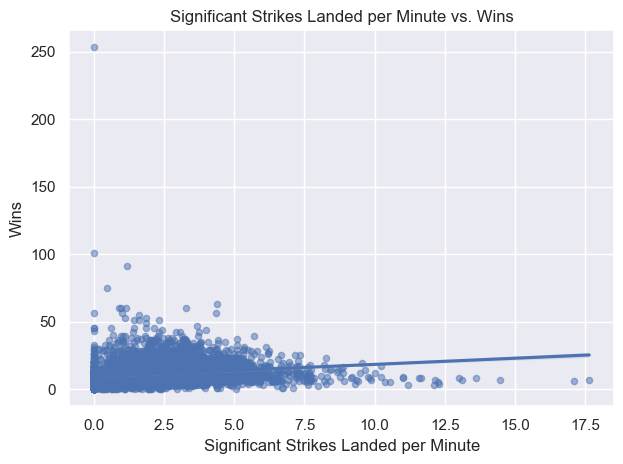

In [30]:


sns.set(style="darkgrid")

# Plotting a scatter plot with regression line and larger point size
sns.regplot(x='significant_strikes_landed_per_minute', y='wins', data=data, scatter_kws={'s':20, 'alpha':0.5}, robust=True)
plt.title('Significant Strikes Landed per Minute vs. Wins')
plt.xlabel('Significant Strikes Landed per Minute')
plt.ylabel('Wins')
plt.grid(True)
plt.tight_layout()
plt.show()

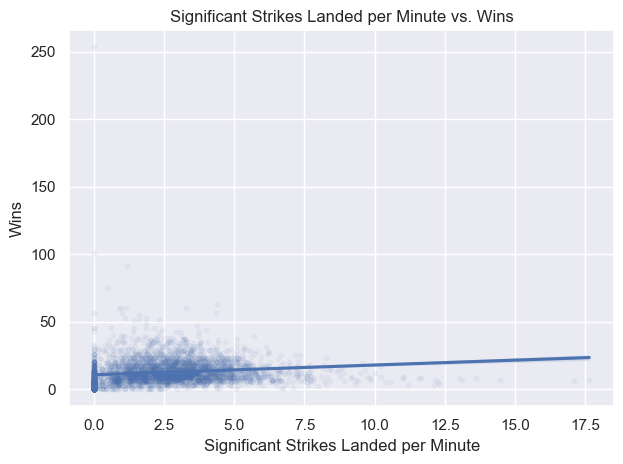

In [55]:
sns.set(style="darkgrid")

# Plotting a scatter plot with linear regression line, larger point size, and transparency
sns.regplot(x='significant_strikes_landed_per_minute', y='wins', data=data, scatter_kws={'s':10, 'alpha':.05})
plt.title('Significant Strikes Landed per Minute vs. Wins')
plt.xlabel('Significant Strikes Landed per Minute')
plt.ylabel('Wins')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
spearman_correlation = data['significant_strikes_landed_per_minute'].corr(data['wins'], method='spearman')

    print("Spearman correlation coefficient:", spearman_correlation)

Spearman correlation coefficient: 0.30845214956141365


In [32]:
data.loc[data['name'] == "Deiveson Figueiredo"]

,name,nickname,wins,losses,draws,height_inches,weight_in_pounds,reach_in_inches,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,weight_division
430,Deiveson Figueiredo,Deus da Guerra,22,3,1,65.000035,134.988883,68.000037,Orthodox,1987-12-18,3.08,55.0,3.46,51.0,1.65,44.0,58.0,1.6,Bantamweight


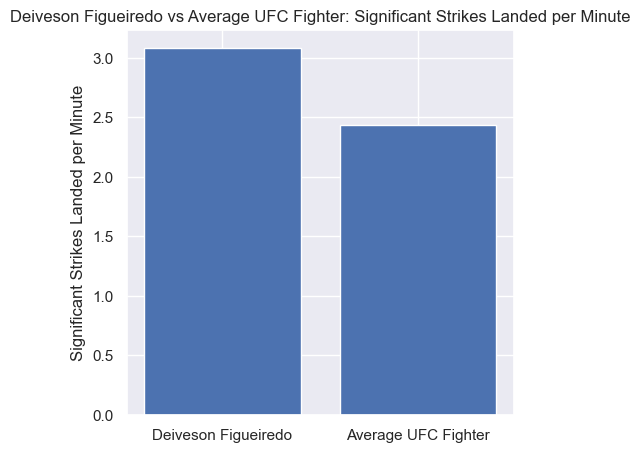

In [58]:
figueiredo_data = data[data['name'] == 'Deiveson Figueiredo']

# Calculate the average significant strikes landed per minute for all UFC fighters
average_strikes_per_minute = data['significant_strikes_landed_per_minute'].mean()

plt.bar(['Deiveson Figueiredo', 'Average UFC Fighter'], [figueiredo_data['significant_strikes_landed_per_minute'].values[0], average_strikes_per_minute])


In [102]:
figueiredo_data = data[data['name'] == 'Deiveson Figueiredo']
garbrandt_data = data[data['name'] == 'Cody Garbrandt']
bantamweight_data = data[data['weight_division'] == 'Bantamweight']
average_strikes_per_minute_bantamweight = bantamweight_data['significant_strikes_landed_per_minute'].mean()

average_strikes_per_minute = data['significant_strikes_landed_per_minute'].mean()
data['significant_strikes_landed_per_minute'].mean()

2.437516419362686